In [44]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns

###  Loading the 'iris' dataset

In [113]:
#importing the dataset as a dataframe
df = pd.read_csv("iris.csv")

In [114]:
#displaying the dataframe
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [115]:
#finding size of dataframe
df.shape

(150, 6)

In [116]:
#checking for null values
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [117]:
#renaming the columns for easier use
df.rename(columns={'SepalLengthCm': 'sepalLength', 'SepalWidthCm': 'sepalWidth', 'PetalLengthCm': 'petalLength', 'PetalWidthCm': 'petalWidth', 'Species': 'species'}, inplace=True)
df.rename(columns={'Id': 'id'}, inplace=True)

In [118]:
#removing the 'id' column as it is irrelevant
df = df.drop('id', axis=1)

In [119]:
#modified dataframe
df.head()

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Visualization of Dataset

In [120]:
#5-number summary
df.describe()

,sepalLength,sepalWidth,petalLength,petalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


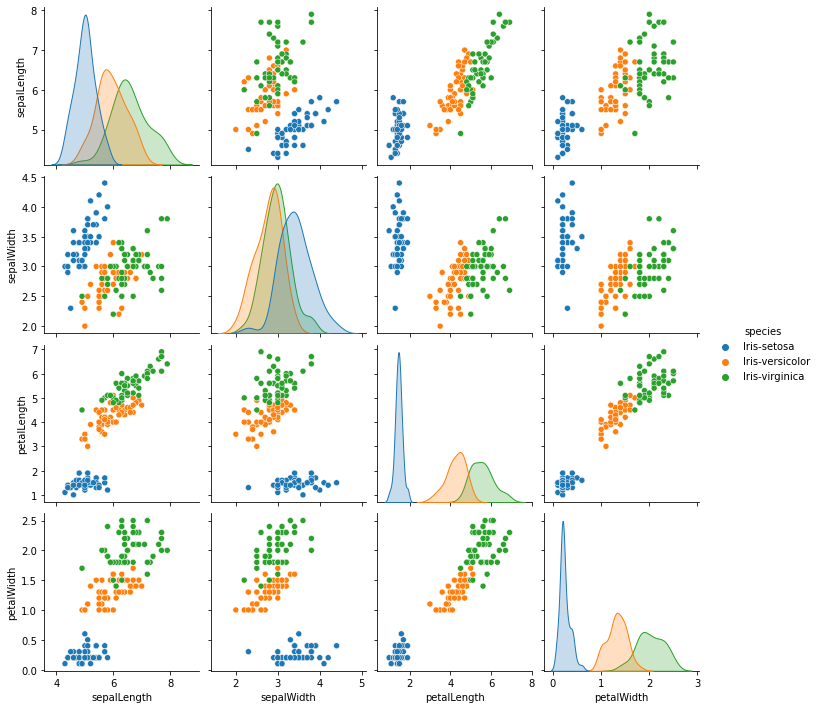

In [121]:
sns.pairplot(df, hue='species')

### Preprocess the Data

In [122]:
#importing the necessary libraries for encoding, standardization and splitting the dataset
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [123]:
#encoding the categorical variable (species)
encoder = LabelEncoder()
df['species'] = encoder.fit_transform(df['species'])

In [124]:
#splitting the data into features and target
X = df.drop('species', axis=1)
y = df['species']

In [125]:
#splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=49)

In [126]:
#scaling the numeric variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Applying ML models

In [176]:
#importing libraries for the classifier models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [177]:
#creating objects of the ML models
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
nb = GaussianNB()
svm = SVC()

In [180]:
#training the models with training dataset
lr.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
nb.fit(X_train, y_train)
svm.fit(X_train, y_train)

SVC()

### Evaluating ML models

In [130]:
#importing libraries to judge the classification parameters
from sklearn.metrics import classification_report, accuracy_score

In [181]:
#evaluation of the trained models
lr_predictions = lr.predict(X_test)
dt_predictions = dt.predict(X_test)
rf_predictions = rf.predict(X_test)
nb_predictions = nb.predict(X_test)
svm_predictions = svm.predict(X_test)

In [132]:
print("Logistic Regression:")
print("Classification Report:\n", classification_report(y_test, lr_predictions))
print("Accuracy:", accuracy_score(y_test, lr_predictions))

Logistic Regression:
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.90      0.90      0.90        10
           2       0.92      0.92      0.92        12

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.93      0.93      0.93        30

Accuracy: 0.9333333333333333


In [133]:
print("\nDecision Tree:")
print("Classification Report:\n", classification_report(y_test, dt_predictions))
print("Accuracy:", accuracy_score(y_test, dt_predictions))


Decision Tree:
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.90      0.90      0.90        10
           2       0.92      0.92      0.92        12

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.93      0.93      0.93        30

Accuracy: 0.9333333333333333


In [134]:
print("\nRandom Forest:")
print("Classification Report:\n", classification_report(y_test, rf_predictions))
print("Accuracy:", accuracy_score(y_test, rf_predictions))


Random Forest:
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.90      0.90      0.90        10
           2       0.92      0.92      0.92        12

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.93      0.93      0.93        30

Accuracy: 0.9333333333333333


In [182]:
print("SVM:")
print("Classification Report:\n", classification_report(y_test, svm_predictions))
print("Accuracy:", accuracy_score(y_test, svm_predictions))

SVM:
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.90      0.90      0.90        10
           2       0.92      0.92      0.92        12

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.93      0.93      0.93        30

Accuracy: 0.9333333333333333


In [167]:
print("Gaussian NB:")
print("Classification Report:\n", classification_report(y_test, nb_predictions))
print("Accuracy:", accuracy_score(y_test, nb_predictions))

Gaussian NB:
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.91      1.00      0.95        10
           2       1.00      0.92      0.96        12

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

Accuracy: 0.9666666666666667


In [135]:
#both Decision Tree and Random Forest gives accuracy and precision as 1

In [136]:
#so we don't need to fine-tune the model or try any other models

### Predicting on a new value

In [141]:
#we need sepallength, sepalwidth, petallength & petalwidth to identify the species
newSL = float(input("sepalLength : "))
newSW = float(input("sepalWidth : "))
newPL = float(input("petalLength : "))
newPW = float(input("petalWidth : "))

sepalLength : 4
sepalWidth : 4
petalLength : 4
petalWidth : 4


In [162]:
#converting the input values to a dataframe
newValue = pd.DataFrame([[newSL, newSW, newPL, newPW]])

In [158]:
#scaling the user input
newValue = scaler.transform(newValue)

C:\Users\codes\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [159]:
#predicting the output for the newValue
prediction = rf.predict(newValue)

In [160]:
#decoding the output by mapping predicted labels to the original species
finalAns = encoder.inverse_transform(prediction)

In [161]:
#classification of the species
finalAns[0]

'Iris-versicolor'

In [155]:
#model is PREPARED.
#now we have to host the website, for that pipeling needs to be done
#the text which we will get, has to be scaled first, then apply the algorithm and decode back

In [184]:
#we will pickle 3 files
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(nb,open('model.pkl','wb'))
pickle.dump(encoder,open('encoder.pkl', 'wb'))